# The National Instant Criminal Check System: Investigating FBI's Official Data

## Table of Contents
- [Introduction to NICS And This Project](#intro)
    - [About this Project](#about)
- [Data Wrangling and Cleaning](#dat)
- [Raising Questions](#quest)
- [Exploratory Analysis](#explore)
    - [Statistical Testing](#tests)
- [Conclusion](#conclusion)

<a id='intro'></a>
## Introduction to NICS And This Project

In 1993, the Federal Government passed the Brady Handgun Violence Prevention Act. Mandated and supported by this law, in 1998, the National Instant Criminal Check System was developed as a means provided to gun shops and weapon providers to autonomously check the background data of a customer and decide if he/she is legible to receive a purchased firearm. It was an innovative system that is still active and records every detail of a weapon transaction.

The NICS system was also designed to have easy communication facilities with law enforcement authorities like the FBI. A shop owner or a registered provider could immediately go through the background history of a purchaser and if found anything suspicious, could contact the agency concerned. Thereafter, appropriate action could be taken in immediate possible time. This way, the law passed in 1993 and the NICS developed in 1998 give shop owners and providers a legal framework and room to individually prevent illegible arms purchases that was not possible before.

The data that this report explores is available at [github](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md) and can also be explored (PDF) at FBI's official website. Here, we'll be exploring two of their data files namely `gun_data.xlsx` and `U.S_census_data.csv`. While one is a .xlsx (excel) file, the latter is a comma separated (.csv) file. The `gun_data.xlsx` data is a much larger file with several variables and thousands of rows. According to sources, this data 'contains the number of firearms checks by month, state and type'. The latter census data contains several variables per state and this is purely for the 2016 data.

Several estimates and studies have already been conducted through these dataset. Around 700,000 such transactions have been denied since 1998 till December of 2017 as one of the estimates stated. However, discrepancies are bound to exist within these numbers and the data itself. As several research organizations have noted, differing state laws of weapons regulations and the federal laws come in clash with each other at least when data is to be recorded and hence one cannot fully trust the extracts and findings that reports so far have been able to find out. As the _The Trace_ pointed out, there were several 'caveats' in the data itself. Almost 40% of respondents acquired their firearms without any background check due to several reasons. Despite such discrepancies, the NICS data is considered to be the most accurate when it comes to firearms background check and suspicious criminal activity. For example, the state of California recorded many loopholes during data recording primarily because of several firearm purchases going unnoticed by the system (or in other words, the data was inconsistent). Besides, permit and background checks and were also excluded.

<a id='about'></a>
### About this Project

In whatsoever the circumstances, proper estimates and data exploration can still be carried out. In statistical reporting, most of the content comments on the data exploration and statistical results and states conclusions thereon. Statistics is thus mostly about data exploration and how one reproduces its results in an intuitive manner.

The `firearms_analysis` prsented here will be a similar effort as the one found in part I of our nanodegree course where students had to explore the bike dataset.

The methodology will be kept simple. First, the data will be loaded and some preliminary exploration performed; these will include some basic statistical exploration and if required, some basic visual exploration as well (although I'm keeping that part as a separate section). Wherever appropriate a statistical test will be carried out, so expect this report to be a long document. A brief look of the datasets will prompt anyone that variable names are unclear of what they are trying to present and hence some 'name cleaning' will be undertaken wherever necessary. If found necessary, some detailed statistical exploration will too follow. Next up will be the visualizations section with histograms and bar graphs making the exploration clearer; here we'll dive into visualizing the mean, median and similar such values for the concerned datasets. Perhaps, some boxplots too will be of help here. Since the data showcases the distribution of weapons across states, there will be an effort to reproduce a geographical visualization of the arms' distribution (although that could be out of my scope for now). Let's begin with loading the appropirate libraries and then exploratory analysis!

<a id = 'dat'></a>
## Data Wrangling and Cleaning

The first chapter of any statistical report, here we load all the required packages to the Python environment and store the data files. Later, we conduct some cleaning process of our existing data frames and make new datasets from the existing ones wherever felt appropriate. So let's proceed.

In [61]:
# Loading libraries
import os # For printing contents of our directory
import numpy as np
import pandas as pd
import statistics as st
import scipy as sp
import matplotlib.pyplot as pyplt
import seaborn as sb
import bokeh as bk # In case we visualize an interactive plot.
from IPython.display import display
from ggplot import * # Another nice library
import scipy.stats as stat
from sklearn import preprocessing # For normalizing functions
from statsmodels.stats import weightstats as wtests

# Removed beakerx dependencies since those are causing problems with Spyder and tabular display (beta stage).
# Please do note that thee packages were loaded specifically under Python 3.6.4 with the latest
# numpy and pandas libraries to avoid any unncessary errors (like I received during the initial development
# of this notebook).

# Also please ignore the warnings since they have hardly afected the overall
# analysis presented here. Tried supressing them with the traditional
# method but some commands here won't work without them which is strange.

Good. Now that we have the appropriate libraries updated and installed, let's now proceed with loading the datasets and getting a brief look of them.

In [62]:
# Loading the datasets
os.listdir()

gun_data = pd.read_excel('gun_data.xlsx')
census = pd.read_csv('U.S. Census Data.csv')

# print some first observations of these tables
print(gun_data.head())
print(census.head())

     month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun   ...    returned_other  rentals_handgun  \
0       317    0.0             15.0   ...               0.0              0.0   
1       160    0.0              5.0   ...               0.0              0.0   
2       631    0.0             13.0   ...               0.0              0.0   
3       366   51.0             12.0   ...               0.0              0.0   
4         0    0.0              0.0   ...               0.0              0.0   

   rentals_long_gun  private_sale_handgun  private

That looks very tedious. How about printing only the column names first to make sense of what the data presents?

In [63]:
list(gun_data)

['month',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']

Excellent! So that gives a clear picture of our `gun_data` data frame. Do a similar thing for the `census` data as well.

In [64]:
list(census)

['Fact',
 'Fact Note',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

Splendid. So that now we have a clear outline of the datasets, let's proceed with which of these columns are important for our survey. For now, the census data looks mysterious so I'll have to dig some more into that and get a sense of what it is trying to portray.

For checking out detailed observations regarding these datasets, it is highly recommended to use a fully functional IDE like Spyder or Rodeo. I personally use Spyder since it has been a favourite for data researchers for a very long time now and comes inbuilt with Anaconda. And its data frame editor is something to really like since it provides the user an Excel-like functionality with full features for cell and column editing. For viewing large data frames, Spyder's data viewer is an excellent tool at hand.

Here on a notebook, viewing large data frames can become extremely tedious especially when there can be several inputs like the ones found in the `census` data. For such rows and observations, we can individually call commands on specific columns to get a clearer picture of our data. However, even that can make a notebook tedious and unnecessarily long. In such cases, having an IDE becomes necessary.

For getting a sense of what these two data frames portray, I'll list down only some of the columns that I have personally found to be important for our report. For example, much of the `census` data portrays population statistics for the 55 states of the United States. Do we require those figures here? Perhaps when we need to establish some relationships between firearm ownership/purchases with population statistics. Like asking the question on weapon usage and ethnic distribution. Do some ethnicities associate themselves more with firearm transactions? If so, then how can we conclude on such results. Does being a white culturally amount to a more pronounced sense of weapon ownership or is this associated with another ethnic group? These are questions that can of course be answered but we'll leave them for a later section here.

For now, let's explore into some details of `census` and `gun_data`.

In [65]:
# Display only selected rows of these data frames.

census['Fact']

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
5         Persons under 5 years, percent, April 1, 2010
6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
12         White alone, percent, July 1, 2016,  (V2016)
13    Black or African American alone, percent, July...
14    American Indian and Alaska Native alone, perce...
15         Asian alone, percent, July 1, 2016,  (V2016)
16    Native Hawaiian and Other Pacific Islander alo...
17    Two or More Races, percent, July 1, 2016, 

As you can see, we have 64 'facts' that the `census` data lists down. Contrary to contemporary data frames that we often come across, here, its the individual rows that are listing down facts rather than columns. All in all, the `census` data records these facts for all the 55 states row-wise. That is, each column is dedicated to a state. However, the `census` data seems to be of secondary importance here since it doesn't list down facts concerned with anything NICS. Perhaps we'll come back to this later.

Let's explore some columns for `gun_data` now. If we look back at the beginning of this section, we see that almost every column is of value for us. However, there are things that need attention. For example, the same `gun_data` available in [PDF](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view) notes down some interesting details at the end of each page. For example, browsing through the PDF, the **notes** section lists down these details:
- The 'Others' column found throughout the data refers to "frames, receivers and other frames that are not either handguns or long guns (rifles or shotguns), such as firearms having a pistol grip tat expel a shotgun shell.". That is, these include parts of several weapons but not whole weapons.
- We have the `Multiple` column that lists down purchases of multiple weapons.

Here, the most important point to note is this (written under 'DISCLAIMER'):
>"These statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale."

**So what we are dealing here is mostly a background check and their recorded numbers instead of the total sales recorded. And hence, the** `Total` **column is more about the 'total background checks' made instead of total transactions.**

That is an important point since we can now shift our attention to exploring the background check system instead of weapon sales that many might think of in the beginning. Whether these background checks are a good source of estimating the sales is a complex question and what several other sources suggest, that it is not because of differing state laws and discrepancies in data when it comes to recording the real sales.

This prompts us to ask new questions, such as, what is the general trend of the weapons check since 1998? Is this general trend a seasonal trend and has it been increasing since its inception? We cannot extract correct results when it comes to estimating weapon sales but we can surely comment if there is an increasing/decreasing trend in the sales as well by generalising the data.

Now, there's one noteworthy point that we forgot to mention. The PDF version shows the data with its columns coloured. This was interesting and helped me in filtering out the data in my mind. For example, the first 5 columns (excluding the `index`, `month` and `state` columns) of `gun_data` relate to the permit checks recorded till 2017 and these have been coloured in yellow. Similarly, columns 8,9 and 10 relate to the pre-pawn section and columns 19-21 record private sales separately under sub-columns for handguns, long guns and others. This is helpful since it will allow me to stratify appropriately the main data frame `gun_data` into sub-data frames thus categorising the data. So let's proceed with this simple step.

In the following code cells, we're going to execute the following steps:
1. Form subsets of the original dataset by the appropriate category.
2. Fill in these datasets with zeros wherever there are NaNs present.
3. With the numerical addition of these datasets complete, add a 'Total' column for each of these datasets to display the sum of the each of the rows.

So let's begin with the first step.

In [66]:
# Stratifying the data and converting required columns to numeric.

permit_data = gun_data.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8]]

# We also add a 'Total' column for each of the datasetin the next section.
# Display columns names for further operations on them.
# Please be patient while these frames load.

pre_pawn = gun_data.iloc[:,[0, 1, 9, 10, 11]]

redemption = gun_data.iloc[:,[0, 1, 12, 13, 14]]

returned = gun_data.iloc[:,[0, 1, 15, 16, 17]]

rentals = gun_data.iloc[:,[0, 1, 18, 19]]

pvt_sales = gun_data.iloc[:,[0, 1, 20, 21, 22]]

ret_to_seller = gun_data.iloc[:,[0, 1, 23, 24, 25]]


<a id = 'na_values'></a>
### Dealing with NA Values

This is a subsection of the data cleaning phase. In almost every data available to human existence, none so far has been qualified as fully 'clean' and missing absent values. In every analysis, analysts need to continuously deal with what they call as missing values. These are values that are not really values, in that they do not possess any quantitative or qualitative attribute.

Missing values come in many styles. In most cases, they are either filled in as simply 'NA', while some have 'NaN' attributed to them. NaN stands for 'not a number', and is usually the case where a variable is understandably a quantitative factor. In such cases, filling in with a meaningful numeric does the job. Whereas in events where a categorical variable is used, there are different methods and ways to deal with them. In mixed variables, a consensus is reached that appeals to both numeric as well as categorical.

In cases where numeric data is being dealt with, filling in some numeric(s) is usually the most normal approach. However, even here the analyst needs to have an idea of what the data looks like and which value would suit the best in place of missing ones. For example, filling in an average value to a column or simply filling every NA cell with a zero is one of the most common approaches. In instances where a more precise number needs to be filled in to cater towards a pre-established result, some math needs to be performed but this is generally the case with complex datasets and however difficult it might be perceived in the beginning, filling missing values usually involves just a couple of steps.

So, unlike rare data that have no missing values, our `gun_data` and `census` are surely to have several thousand missing values. Let's have a brief look of them.

In [67]:
# Check number of na values

print('There are {} row(s) and {} column(s). Hence, there are a total of {} number of cell(s).'.
      format(len(gun_data), len(gun_data.columns.tolist()), len(gun_data)*len(gun_data.columns.tolist())))

There are 12485 row(s) and 27 column(s). Hence, there are a total of 337095 number of cell(s).


So we have a total of 337,095 cells for the `gun_data`. Of these, the number of empty/NA cells are:

In [68]:
# Find total NAs according to column
display(gun_data.isnull().sum())

# Total NAs in the dataset
sum(gun_data.isnull().sum())

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

154595

So there are a great number of missing values here, almost 45.8% of all the cells have either NA or NaN in them. Thats a lot of incomplete data and has to be dealt with! Also, if we note these results according to each column, then the `permit_recheck` column that is of much importance here has over 11,000 missing values. Almost every column in the latter part of the data frame has thousands of missing cells.

Now, there are several ways we can approach this problem. A [guide](# https://pandas.pydata.org/pandas-docs/stable/missing_data.html) to the official Pandas documentation lists down some very effective techniques to fill down empty/NA values. One of them is simply filling them with all zeros, but that is a very generic approach and although sensible to portray them with something numeric (0 in this case), we can still go further and see how different approaches work.

Another effective method is the interpolation that suits very well for time-series data. Since in time-series, periodic increase/decrease is explained quite well by quadratic and linear algebra, we can try going ahead with it. I can write lines of code after code comparing how the results will differ for each of the method (either filling zeros or doing an interpolation) but that will extend this report to an even longer length. Since that is absolutely not required we'll check with interpolating the results and fill in values for each of our datasets respectively.

In [69]:
# Fill every dataset's incomplete values with zeros.

permit_data = permit_data.interpolate()

pre_pawn = pre_pawn.interpolate()

returned = returned.interpolate()

rentals = rentals.interpolate()

pvt_sales = pvt_sales.interpolate()

ret_to_seller = ret_to_seller.interpolate()

Great! Let's check on the empty values now.

In [70]:
# Checking again

sum(permit_data.isna().sum())

0

Yes! The difference between `interpolate()` and a simple `.fillna()` is that while the latter fills in empty values with an argument the user provides, that could be anything like a mean of a specified column or just a general mean value, the former function is more realistic in its approach in that it can fill values that are varying and resemble that of a quadratic function run over a range of values. So let's proceed ahead with adding totals for each of the datasets.

In [71]:
# Time to add a 'Total' column for each of the data frames above (except gun_data that already has one).
permit_data['Total'] = permit_data.permit + permit_data.permit_recheck + permit_data.handgun + permit_data.long_gun + permit_data.other + permit_data.multiple + permit_data.admin


pre_pawn['Total'] = pre_pawn.prepawn_handgun + pre_pawn.prepawn_long_gun + pre_pawn.prepawn_other


redemption['Total'] = redemption.redemption_handgun + redemption.redemption_long_gun + redemption.redemption_other


returned['Total'] = returned.returned_handgun + returned.returned_long_gun + returned.returned_other


rentals['Total'] = rentals.rentals_handgun + rentals.rentals_long_gun


pvt_sales['Total'] = pvt_sales.private_sale_handgun + pvt_sales.private_sale_long_gun + pvt_sales.private_sale_other


ret_to_seller['Total'] = ret_to_seller.return_to_seller_handgun + ret_to_seller.return_to_seller_long_gun + ret_to_seller.return_to_seller_other

/Users/Shiv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
# Confirm the layouts are correct
display(permit_data.head())

display(permit_data.tail())

display(pre_pawn.head())

display(returned.head())

display(rentals.head())

display(pvt_sales.head())

display(ret_to_seller.head())

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,Total
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,29309.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5840.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,26011.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,14559.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,122569.0


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,Total
12480,1998-11,Virginia,0.0,0.0,14.0,2.0,2.0,8,0.0,26.0
12481,1998-11,Washington,1.0,0.0,65.0,286.0,2.0,8,1.0,363.0
12482,1998-11,West Virginia,3.0,0.0,149.0,251.0,2.0,5,0.0,410.0
12483,1998-11,Wisconsin,0.0,0.0,25.0,214.0,2.0,2,0.0,243.0
12484,1998-11,Wyoming,8.0,0.0,45.0,49.0,2.0,5,0.0,109.0


,month,state,prepawn_handgun,prepawn_long_gun,prepawn_other,Total
0,2017-09,Alabama,15.0,21.0,2.0,38.0
1,2017-09,Alaska,5.0,2.0,0.0,7.0
2,2017-09,Arizona,13.0,6.0,0.0,19.0
3,2017-09,Arkansas,12.0,13.0,0.0,25.0
4,2017-09,California,0.0,0.0,0.0,0.0


,month,state,returned_handgun,returned_long_gun,returned_other,Total
0,2017-09,Alabama,0.0,0.0,0.0,0.0
1,2017-09,Alaska,28.0,30.0,0.0,58.0
2,2017-09,Arizona,82.0,5.0,0.0,87.0
3,2017-09,Arkansas,0.0,0.0,0.0,0.0
4,2017-09,California,0.0,0.0,0.0,0.0


,month,state,rentals_handgun,rentals_long_gun,Total
0,2017-09,Alabama,0.0,0.0,0.0
1,2017-09,Alaska,0.0,0.0,0.0
2,2017-09,Arizona,0.0,0.0,0.0
3,2017-09,Arkansas,0.0,0.0,0.0
4,2017-09,California,0.0,0.0,0.0


,month,state,private_sale_handgun,private_sale_long_gun,private_sale_other,Total
0,2017-09,Alabama,9.0,16.0,3.0,28.0
1,2017-09,Alaska,17.0,24.0,1.0,42.0
2,2017-09,Arizona,38.0,12.0,2.0,52.0
3,2017-09,Arkansas,13.0,23.0,0.0,36.0
4,2017-09,California,0.0,0.0,0.0,0.0


,month,state,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,Total
0,2017-09,Alabama,0.0,0.0,3.0,3.0
1,2017-09,Alaska,0.0,0.0,0.0,0.0
2,2017-09,Arizona,0.0,0.0,0.0,0.0
3,2017-09,Arkansas,0.0,2.0,1.0,3.0
4,2017-09,California,0.0,0.0,0.0,0.0


Excellent! The couple of cells above mark the beginning of our analysis. Now that we have working datasets for each category, performing and extracting valuable information should now become as consistent and readable as we wanted.

**Note:** Couple of warnings have been displayed regarding the indexing properties of these data frames. As a preventive measure and to keep proper indexing at its place, Pandas displays this warning. However, not every case needs to treat this as a compulsory step to introduce in some corrective fixes. Since our data frames are being outputting as expected, the warnings need to be ignored.

<a id = 'quest'></a>
## Raising Questions

With any statistical reporting, questions need to be asked first and appropriate answers selected for those questions. Many ask questions as an extension to the introductory part while some ask after some of the data exploration has been done.

Since the latter allows one to get a better picture of the data and then ask more appropriate questions, I have therefore fixed this section after the data cleaning process. The above datasets are very interesting indeed and an innumerable number of questions can be posed before these datasets. For example, one of the primary questions that at once comes in mind is that how do different weapons trend since 1998? What we have here is a division into 'handguns' and 'long guns'. It would be interesting to check on this and reveal some insights on how the NICS system has so far recorded for these categories, something that I exclusively answer in the statistical testing section of the exploration phase below.

However, there are still thousands of questions that can be framed up. What is the participation of the states in recording NICS data? What trends can be extracted for each state and what would it imply for law makers and policy designers? Does the permit data give an accurate picture of weapon ownership and sales or does it provide only the checks recorded so far while weapon sales means another topic? Some of these questions can well be answered by the data we have while some others might require additional features and datasets.

In this report, I'll be answering on how some states perform when it comes to differences in weapon ownership. Do handguns attract more checks than long guns or is it more towards for multiple ownership? As we'll find out, the answers differ by a lesser degree. While in most states, single transactions occur for several weapons, there is little difference between the statistical differences of weapon categories except when it comes to some remote areas and states that are less prone to an armed populace, like the state of Wyoming when compared to California, has much less weapon checks recorded; and that too most of it being checks on small arms. On the contrary, the latter state has recorded pretty much similar data for both categories.

<a id = 'explore'></a>
## Exploratory Analysis

Exploratory analysis is the process of analysing stuff through descriptive statistics and visualizations. It's a compulsory step in almost every statistical analysis and is also indirectly executed in other scientific publishing. The remaining processes of inference and conclusion are dependent on data exploration.

Now that we have our primary datasets ready, we proceed with analysing some descriptive statistics and conducting some statistical tests. For example, lets describe the `handgun` column from the `permit_data`.

In [73]:
permit_data.handgun.describe()

count     12485.000000
mean       5935.268963
std        8613.066446
min           0.000000
25%         865.000000
50%        3059.000000
75%        7277.000000
max      107224.000000
Name: handgun, dtype: float64

Those are some interesting figures we have. And this is just one of the many ways one can summarise the data. Since I'm fairly new to Python3 and also added the lack of time and pressure to finish this project before the term end, I'll be keeping the sections as concise but at the same time as meaningful and understandable as possible.

What we have above is the summary for the `handgun` column of `permit_data`. Now these are nation-wide statistics but we can also filter out according to states and then describe each column fluently. For the present results, since 1998, there have been on an average 5935 checks on small arms (handguns) with a maximum recorded 107,224 checks. These are again nation-wide numbers. As we shall see later, the minimum and maximum values can be extracted out and checked which rows they were found in. In this manner, the state and year of these respective values and be found out and valuable information gained from it.

Let's see how long guns compare.

In [74]:
permit_data.long_gun.describe()

count     12485.000000
mean       7805.121185
std        9304.099131
min           0.000000
25%        2079.000000
50%        5118.000000
75%       10374.000000
max      108058.000000
Name: long_gun, dtype: float64

Well, long guns recorded more checks with a mean of 7805 checks performed so far since 1998 with a maximum of 108,058. Researchers can thus get a sense that there are approx. as many long guns in the U.S. as hand guns (with long guns recording just a little higher than their shorter contemporaries). Let's see how multiple checks compared.

In [75]:
permit_data.multiple.describe()

count    12485.000000
mean       268.603364
std        783.185073
min          0.000000
25%         15.000000
50%        125.000000
75%        301.000000
max      38907.000000
Name: multiple, dtype: float64

With a mean of 268 and a maximum figure of 38907, I would say that this is skewed data and there seems to be some inconsistency here. Nevertheless, the NICS recorded more checks on single weapons than multiple and that might provide us with the assertion that people tend to buy weapons in single rather than buying multiple weapons in one transaction.

Similar to our descriptive statistics presented above, we can have a number of such outputs for every column and data frame of importance. But that makes things tedious; so visualization comes to the rescue. For example, we can ask the question if permit checks have increased or decreased in an individual state. Let's take the case of Wyoming that is one of the most sparsely populated and inactive states in the country. Revealing some information from it could surprise some of us.

There are always several ways to achieve this. A bar graph or a simple time-series curve will fit perfectly to the above question and we can go on with many ways to do grouping the data itself before performing a visualization. However, every approach needs to be consistent and tidy, and I personally proceed with filtering a separate data frame and running operation on it rather than doing the same thing on a parent data frame. So let's make a new data frame for the state Wyoming from the `permit_data` and extract insights from it.

In [76]:
# For Wyoming.

wyoming_permit_dat = permit_data[permit_data.state == 'Wyoming']

print(len(wyoming_permit_dat), 'are the number of rows.')

display(wyoming_permit_dat.head())

display(wyoming_permit_dat.tail())

227 are the number of rows.


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,Total
54,2017-09,Wyoming,280.0,11.0,1337.0,2015.0,61.0,97,1.0,3802.0
109,2017-08,Wyoming,408.0,15.0,1411.0,1762.0,62.0,86,2.0,3746.0
164,2017-07,Wyoming,279.0,9.0,1231.0,1395.0,82.0,77,11.0,3084.0
219,2017-06,Wyoming,350.0,16.0,1520.0,1544.0,107.0,85,0.0,3622.0
274,2017-05,Wyoming,435.0,19.0,1589.0,1578.0,101.0,91,5.0,3818.0


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,Total
12264,1999-03,Wyoming,171.0,0.0,986.0,1574.0,2.0,45,0.0,2778.0
12319,1999-02,Wyoming,150.0,0.0,831.0,1584.0,2.0,77,1.0,2645.0
12374,1999-01,Wyoming,67.0,0.0,668.0,1401.0,2.0,44,0.0,2182.0
12429,1998-12,Wyoming,113.0,0.0,925.0,2303.0,2.0,38,0.0,3381.0
12484,1998-11,Wyoming,8.0,0.0,45.0,49.0,2.0,5,0.0,109.0


Observing some of the output for `wyoming_permit_dat` really gives us some intriguing values. For example, in November of 1998 (the year when NICS started functioning), we have number of handgun checks at just 45. The following month, this number skyrockets to 925 (a 2055% increase!) and has since then remained consistent. Such are the similar trends felt for the rest of the columns as well.

Let's see how handguns have faired in all these years

In [77]:
# Sort out the data frame according to time period, keeping the oldest first
wyoming_permit_dat = wyoming_permit_dat.sort_values(by = ['month'])

wyoming_permit_dat.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,Total
12484,1998-11,Wyoming,8.0,0.0,45.0,49.0,2.0,5,0.0,109.0
12429,1998-12,Wyoming,113.0,0.0,925.0,2303.0,2.0,38,0.0,3381.0
12374,1999-01,Wyoming,67.0,0.0,668.0,1401.0,2.0,44,0.0,2182.0
12319,1999-02,Wyoming,150.0,0.0,831.0,1584.0,2.0,77,1.0,2645.0
12264,1999-03,Wyoming,171.0,0.0,986.0,1574.0,2.0,45,0.0,2778.0


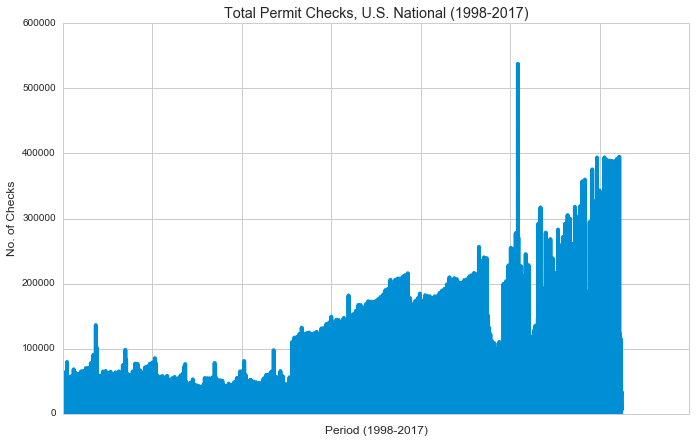

In [78]:
%matplotlib inline


# Plot a simple line plot
# Replaced earlier version's untidy plot

permit_data_sorted = permit_data.sort_values(by = ['month'])

permit_data_sorted.plot(x = 'month', y = 'Total', kind = 'line', figsize = (10,7), legend = False, use_index = True)
pyplt.style.use('seaborn-whitegrid')
pyplt.xlabel('Period (1998-2017)')
pyplt.ylabel('No. of Checks')
pyplt.title('Total Permit Checks, U.S. National (1998-2017)')



And so there we have a simple bar plot without the dimensions specified. It's interesting note the trends here. It looks like that at some point of time, there was a sharp rise in these small arms checks. What could be the reason? There also seems to be occasional seasonal spikes in the data that indicates handgun transactions are mor of a cyclical phenomenon in the country.

Let's proceed with cleaner and more informative visualizations and descriptions.

In [79]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_datetime64_any_dtype

print('Is it datetime?:', is_datetime64_any_dtype(wyoming_permit_dat['month']))

print('Is it string?:', is_string_dtype(wyoming_permit_dat['month']))

Is it datetime?: False
Is it string?: True


One of the things that data scientists and statisticians deal with is assigning appropriate data types to correct columns. One of the most important and also incomplete features of most data frames are the unconverted date and time data. As the above code cell just revealed, the `month` column for our data frame is still a string. Conducting grouping operations requires us to convert such data to the appropriate data type. Let's experiment with converting the `month` column of our `wyoming_permit_dat` frame to the correct format and conduct further analysis on it.

Now, there are two ways we can go ahead with this - either convert the 'month' column to a single `datetime` format, or add additional columns to the existing data frame with something like 'year' and 'month' as separate column. Since the latter approach will make the data frame more versatile but will require more code to achieve that, let's try going ahead with latter approach. We'll have two function here; one will add a new column that will have the appropriate `datetime` objects in it and a second function that will rearrange the columns to include the new column at the beginning and finally remove the old 'month' column.

In [80]:
# This will rearrange the columns

def new_dates(data):
    
    # Make a new column with proper dates
    data['date'] = pd.to_datetime(data['month'], format = '%Y-%m')
    
    # Return some output
    return data['date'].head(3)

So we have a nice function that will do the job of converting some values to the appropriate `datetime` format and replacing the old values with these new data. Let's test on the Wyoming dataset.

In [81]:
new_dates(wyoming_permit_dat)

12484   1998-11-01
12429   1998-12-01
12374   1999-01-01
Name: date, dtype: datetime64[ns]

And finally we have a new 'date' column for our Wyoming data and that has the proper `datetime64` data type. We also have the `col_rearrange` function that can well be applied to any data frame and output displayed. Now, there is one final step remaining and that is rearranging the columns so that the 'date' column becomes the replacement for 'month' and the latter column is no longer available. That will make our dataset a proper time-series data.

In [82]:
# For this to happen, we first list down all the columns of the data frame
# and place the last column at the beginning and remove the old 'month'
# column.

wyoming_permit_dat = wyoming_permit_dat.drop('month', 1) # Drop the month data

cols = wyoming_permit_dat.columns.tolist()

cols = cols[-1:] + cols [:-1]

wyoming_permit_dat = wyoming_permit_dat[cols] # Place everything at place

wyoming_permit_dat.head(3)

,date,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,Total
12484,1998-11-01,Wyoming,8.0,0.0,45.0,49.0,2.0,5,0.0,109.0
12429,1998-12-01,Wyoming,113.0,0.0,925.0,2303.0,2.0,38,0.0,3381.0
12374,1999-01-01,Wyoming,67.0,0.0,668.0,1401.0,2.0,44,0.0,2182.0


Excellent! So, we have finally a proper time-series data for the Wyoming state's permit checks. One thing to notice is that although in statistical research, the researchers are required to draw a line between all the traditional processes (data cleaning -> exploratory analysis -> inferences -> conclusions), in essence, all these processes are almost interlinked and one needs to perform them whenever the situation demands. This applies specifically to data cleaning and exploration where the latter is also part of the inferences part.

Now that we have a time-series, can we plot a time-series graph?

In [83]:
# Let's use the ggplot and pandas plotting modules since those allow plotting in lesser code.

# Proceed by grouping the data we have according to years and then plotting
# with a bar plot. We group the data and set 'mean' and 'max' as the paratmetres here.

years = []
for x in range(1998,2018):
    years.append(x) # That will fill in our years column

# This returns a data frame
wyoming_grouped = wyoming_permit_dat.groupby(wyoming_permit_dat['date'].dt.year)['Total'].agg(['min', 'mean', 'max'])

wyoming_grouped

# Excellent output!

,min,mean,max
date,,,
1998,109.0,1745.000000,3381.0
1999,2182.0,2958.333333,4243.0
2000,2204.0,2859.916667,3909.0
2001,2233.0,2821.750000,3950.0
2002,1822.0,2386.250000,3268.0
2003,1829.0,2356.916667,3837.0
2004,2043.0,2558.500000,4174.0
2005,2080.0,2793.416667,4754.0
2006,2494.0,3186.500000,4951.0


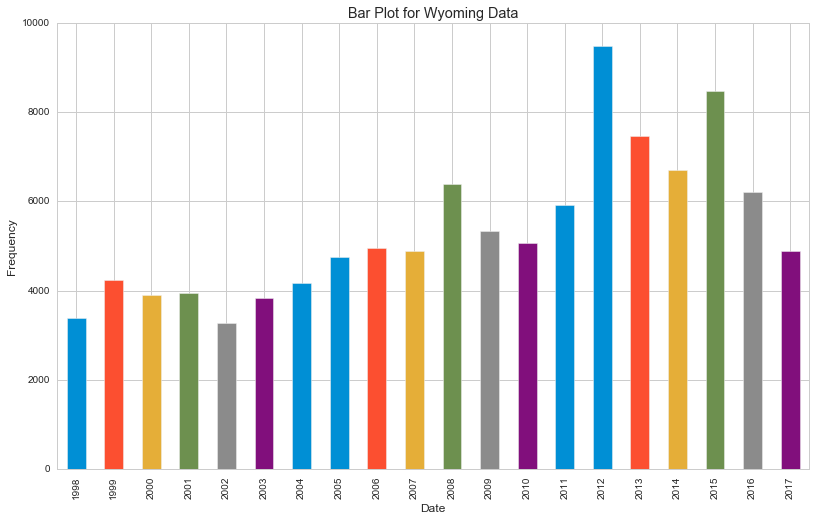

In [84]:
# Reset the date index to simple date column
wyoming_date_grouped = wyoming_grouped.reset_index()

# Plot
wyoming_date_grouped.plot(x = 'date', y = 'max', kind = 'bar', figsize = (12, 8), legend = False)
pyplt.xlabel('Date')
pyplt.ylabel('Frequency')
pyplt.title('Bar Plot for Wyoming Data')

Since now we have a proper grouped dataset of the Wyoming permit data, a number of plots and statistical analysis can be conducted; there really is no limit to it. Let's try plotting a time-series for all the available values we have. For example, the cell below does it through `ggplot` and plots the total checks done in Wyoming since 198.

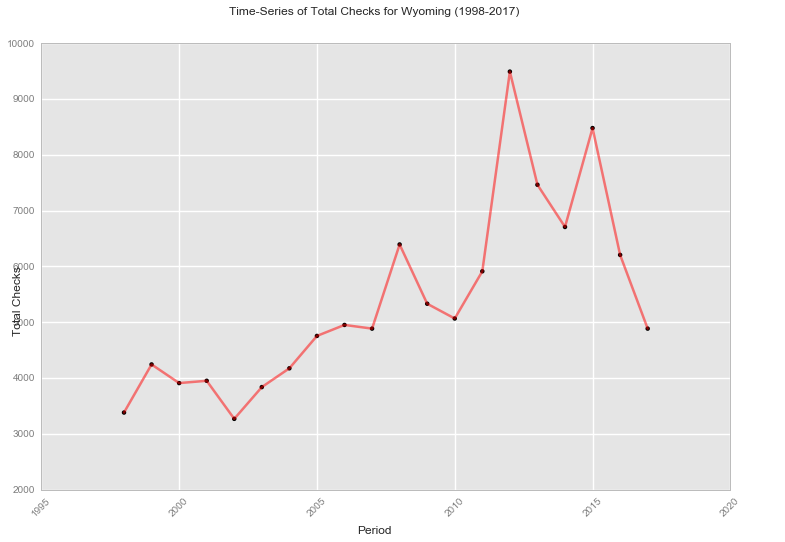

<ggplot: (7548385807)>

In [85]:
# This cell showcases some simple plotting capabilities of ggplot.
# Comes close to R's capability but that is more versatile.

plt = ggplot(wyoming_date_grouped, aes(x = 'date', y = 'max'))
    
plt + geom_point() + geom_line(color = 'red', alpha = 0.50, size = 2.5) + \
    theme(axis_text_x = element_text(angle = 45, hjust = 1), 
          title = 'Time-Series of Total Checks for Wyoming (1998-2017)', 
          axis_title_x = 'Period', axis_title_y = 'Total Checks')

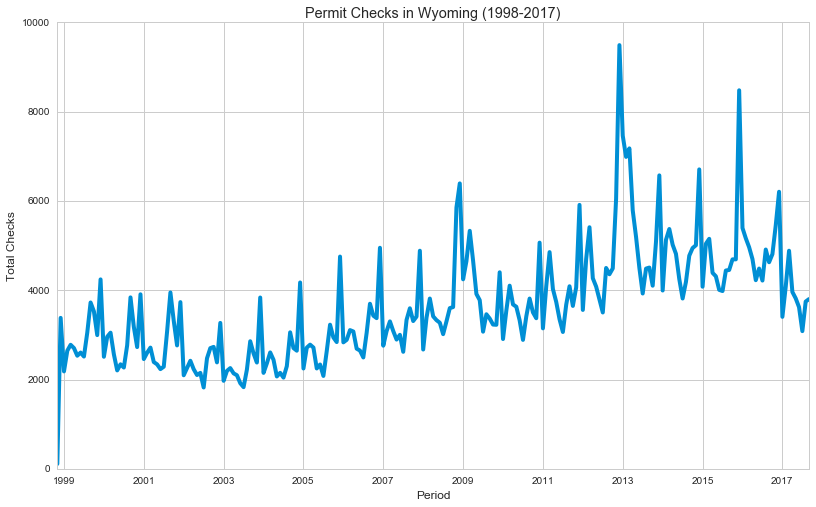

In [86]:
# This cell showcases the default plotting through pandas that
# in turn uses matplotlib's mechanics.

wyoming_permit_dat.plot(x = 'date', y = 'Total', figsize = (12, 8), 
                        legend = False, title = 'Permit Checks in Wyoming (1998-2017)')
pyplt.xlabel('Period')
pyplt.ylabel('Total Checks')
pyplt.show()

Both plots are neat-looking and versatile. However, matplotlib's suitability seems more worthwhile since it automatically presents the true period labels while making the graph more streamlined and smooth to look at.

In case of ggplot, it offers more flexibility and although I haven't shown its full capability in the above cell, for now, ggplot's graphics look more detailed but at the same time more tedious and crowded. It also requires more code to reproduce a plot. The 'Period' axis also shows raw date labels, so that requires some work while matplotlib shows the correct year labels as I had required without additional code.

However, both graphs are successful in showing up the trend of permit checks in the state. Checks through all these years have gone up substantially and there is this huge spike around 2012-2013 that makes us ask on why the numbers skyrocketed so much? There is yet another spike around 2015 and then it goes down dramatically. Interesting insights!

<a id = 'tests'></a>
### Statistical Testing

Statistical testing is one of the steps that involves testing the validity of claims and hypothesis through statistical evidences. It is a step that relies on factual evidence and rationale to come to conclusions. Statistical testing is also commonly called hypothesis testing because in this process, certain hypothetical claims are advanced that need to be tested through mathematical formulae (tests) and conclusions be made upon them.

These hypothesis are normally called as the null hypothesis and alternative hypothesis. In null hypothesis, a neutral claim is tested out while in alternative hypothesis, an opposite of the null is tested out. Usually denoted as $H_0$ for null hypothesis and $H_a$ for the alternative, several tests according to the size of the data are conducted and commented upon. 

There are two types of samples, namely small samples that have $n < 30$ and large samples that have $n > 30$. All these samples have some common assumptions that help them in establishing a kind of consistency when it comes to applying some common statistical tests. For example, small and large samples are all assumed to be derived from a common population. And since a population is always normally distributed, it is thus also assumed that the samples will also be normally distributed.

Which puts us to the fact that there are two most commonly used tests - the Student's t-test and the z-test. While the former is mostly used with small samples, the z-test is usually a large sample test. There is a twist here; while small sample tests can also be applied to a population, a test designed for a population cannot be used on a sample!

For single samples, the t-test is mathematically expressed as $$t = \frac{\bar{x} - \mu_{0}}{s/\sqrt{n}}$$ While the z-test is almost 99% similar, like so: $$z = \frac{\bar{x} - \mu_{0}}{\sigma/\sqrt{n}}$$

Where $\bar{x}$ is the calculated mean, $\mu_0$ is the hypothetical mean, _s_ pertains to the estimated value of the standard deviation while $\sigma$ is the calculated standard deviation. The difference is again in just one assumption and that is that the t-test assumes an unknown standard deviation of the distribution and hence an estimated value of it _s_ is used in place of $\sigma$ which is the case used in the z-test. Since most of our datasets here are large with observations greater than 30, we'll the z-test as much as possible, although the t-test too will suffice.

Ok, so that's the introduction to statistical hypothesis testing. Now, we can go ahead with conducting a simple hypothesis test. A number of questions can be raised here and appropriate tests be carried out; so let's ask the question if there is a significant difference between the mean values of handgun permit checks in the U.S. and long gun permit checks. In conducting such a test, we'll be able to conclude without going into technical details on whether Americans possess more small arms than long guns.

In [87]:
# In this cell we test the difference between nationwide permit checks for
# handguns and long guns. That is, a simple t-test testing the difference
# in means of the two variables.

# For this, let's reiterate the statistical descriptions from the permit_data

display(permit_data.describe())

# Z-tests can be carried out through existing libraries but sometimes
# defining own functions is not a bad thing.

# Following function infuneced by ideas provided in this post:
# https://stats.stackexchange.com/questions/124096/two-samples-z-test-in-python

def z_p_vals(bar_x1 , bar_x2, sigma_1, sigma_2, n1, n2, mu = 0):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    
    PooledSD = sqrt((sigma_1**2/n1) + (sigma_2**2/n2))
    
    z = ((bar_x1 - bar_x2) - mu/PooledSD)
    
    p = 2*(1 - norm.sf(abs(z)))
    
    return(round(z, 4), round(p, 4))

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,Total
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6406.578454,102.727433,5935.268963,7805.121185,159.917020,268.603364,58.795274,20737.011694
std,23734.083938,2756.731662,8613.066446,9304.099131,913.145613,783.185073,604.262478,31897.122912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2079.000000,2.000000,15.000000,0.000000,4439.000000
50%,518.000000,0.000000,3059.000000,5118.000000,2.000000,125.000000,0.000000,11517.000000
75%,4258.000000,0.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,24206.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,537568.000000


The above table will help us in noting down the values required by the function I quoted above (courtesy of crossvalidated.com), notably the `std` values for handguns and long guns. These values are $\sigma_1 = 8615$ and $\sigma_2 = 9307$. The means are $\bar{x1} = 5931$ while $\bar{x2} = 7798$. The $\mu$ value will remain 0 by default. So, let's formulate our hypothesis.

Since we're determining if there is a significant difference between these two weapon types and that if the difference is purely by chance or are they interrelated, our null hypothesis should thus state that "there is no significant difference between the two" while the alternative will state that "there is a significant difference between the two". Mathematically, these will be written down as $$H_a: x1 = x2$$ $$H_a: x1 \neq x2$$

Now, couple of points need to be listed down when conducting statistical tests. In these testing processes, there are steps that we refer to as 'normalization' and 'standardization'. These steps are in turn referred to as **rescaling of data**. That is, in reaching meaningful results, statisticians make use of values that can really be used in calculation. For example, in our datasets available with us, we're dealing with extremely large values and thus a systematic statistical test cannot really be conducted with these original values.

So, what we have are several options. I'm novice in machine learning, but even without it, a statistician needs to rescale some values for a modern computer to be able to calculate since large values gathered in thousands of rows  eventually reduces computing power substantially and in extreme cases, even crash a system. Hence, what people do is they cut down data by randomly selecting values and storing them as rescaled and normalized datasets and then eventually conducting whatever tests that come in mind.

In our case too, we have several options to choose from. I can either make a new function that would subset a data frame to the state I specify and then run a z-test on the values after rescaling them (all included in just one single function), or simply randomly select almost half of the values from the original `gun_data`, rescale the values and run tests on them. Let's try running both; in that manner we'll have insights on how states differ from national values.

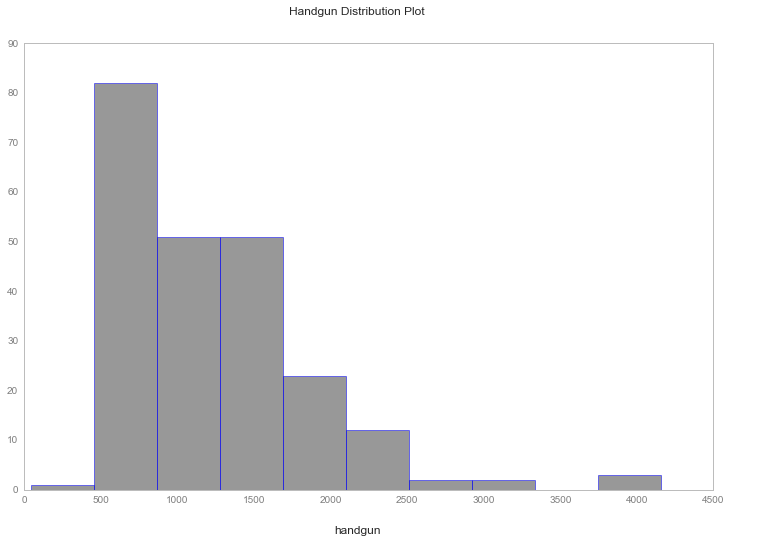

<ggplot: (7548385947)>

In [88]:
# Here I'll conduct a  simple z-test on any one of the state's data.
# Let's try on Wyoming.

hist_plot = ggplot(wyoming_permit_dat, aes('handgun'))

hist_plot + geom_histogram(color = 'blue', alpha = 0.5) + \
    theme_bw() + theme(title = 'Handgun Distribution Plot')

Seems more like a skewed distribution but has just some of the characteristics of a normally distributed data. How do long guns compare?

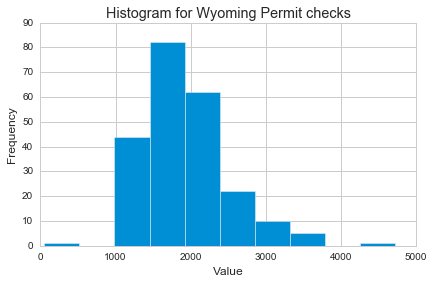

In [89]:
# Long guns comparison

pyplt.hist(wyoming_permit_dat['long_gun'])
pyplt.title('Histogram for Wyoming Permit checks')
pyplt.xlabel('Value')
pyplt.ylabel('Frequency')
pyplt.show()


A much more normal looking distribution I believe. The next step will be to convert these columns into separate arrays for the z-test to work on. Its a simple one-line command.

In [90]:
# Steps to normalize these results:
# Convert data to a single column array.
# Rehape the array to a single sample
# Normalize the results

handgun_array = np.array(wyoming_permit_dat['handgun'])

long_gun_array = np.array(wyoming_permit_dat['long_gun'])

z, p = wtests.ztest(handgun_array, long_gun_array)

print("The z-value comes out to be {}".format(z))

print("The p-value comes out to be {}".format(p))

The z-value comes out to be -12.307463225398111
The p-value comes out to be 8.257808982973031e-35


Ok. So, the overall z-score is a minor -12.3074 with a p-value so small that it hardly even matters at all. And the p-value is the most important here since that gives us the idea of which hypothesis to accept. Generaly, there are three interpretations of a p-value:
1. A value less than 0.5 indicating notion against the alternative.
2. A value more than 0.5 indicating acceptance of the null.
3. A value lying at 0.5 that could mean the hypothesis could go either way.

Here, we have a p-value that has almost 35 zeros before a digit. That is, 0.8257 with 45 zeros after the point! Since such a number is almost zero, we thus accept the alternative hypothesis. Hence, as the z-score additionally supports this, there is significant difference between in the mean values of small and long arms in Wyoming state and people seem to buy more long guns than small arms as the differences in real values suggest.

In fact, we can have the code above parsed in a single function that would print histograms as well as print out the z-score and p-values for any data we specify.

In [91]:
# This will print out everything in just one command

def z_p_scores(data):
    """
    This function takes in a dataframe and coverts some of its
    coluns into numpy arrays, plots histograms for them and
    returns combined z-score and p-values for those arrays.
    ========
    Parameters:
    
    data = a pandas data frame
    """
    array_1 = []
    array_2 = []
    
    import random
    
    # Extract columns and covert to arrays
    array_1 = np.array(data['handgun'])
    random.shuffle(array_1)
    
    array_2 = np.array(data['long_gun'])
    random.shuffle(array_2)
    
    
    # Plot histograms
    pyplt.hist(array_1, bins = 50, normed = True)
    
    pyplt.hist(array_2, bins = 50, normed = True)
    
    
    # Plot legend and lables
    pyplt.legend(['hand guns', 'long guns'])
    pyplt.xlabel('Value')
    pyplt.ylabel('Frequency')
    pyplt.title('Histogram for Handguns and Long Guns')
    
    # Return z and p scores
    z, p = wtests.ztest(array_1, array_2)
    
    print("The z-value comes out to be {}".format(z))

    print("The p-value comes out to be {}".format(p))
    

The z-value comes out to be -0.10574618793191334
The p-value comes out to be 0.9157837330978278


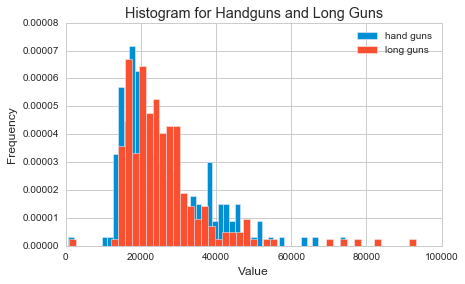

In [92]:
# Let's try this on California

california_dat = permit_data[permit_data.state == 'California']

z_p_scores(california_dat)

Those are great results and as expected. The simple function I wrote above thus provides the researcher a one line command that will show everything related to a z-score for a distribution, including a histogram plot containing histograms for two columns. This function can now be run on any data frame but the only requirement will be a data frame that hs a limited number of observations. The z-test provided by the `statsmodels` module is limited to run on only a specific number of rows, since its unable to compute the value on computationally intensive datasets, so its always a nice thing in general to divide data frames into n-equal datasets before extracting results.

Let's test this out again on the state of Arizona.

The z-value comes out to be 4.74511322317176
The p-value comes out to be 2.0838973964641964e-06


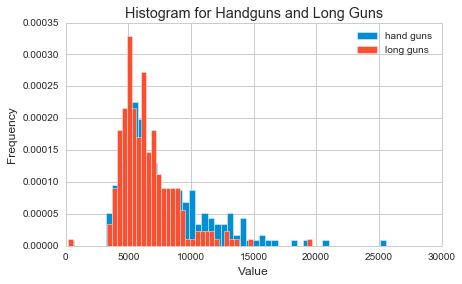

In [93]:
# Separate out Arizona

arizona_dat = permit_data[permit_data.state == 'Arizona']

# Run the function

z_p_scores(arizona_dat)

It's interesting how these statistics differ state-wise. In Arizona too, similar patterns are observed for both weapon categories. A value of 4.7451 yet again suggests a significant score; add to it the small p-value we found again, and one can be sure to again reject the null hypothesis that there is no difference in permit patterns for both weapon categories. As the plot above tells us, at some point of time, probably during the time of economic depression at earlier periods of this decade, people tended to buy more small arms and hence a more blue colour to the righter side of the plot.

In this manner, we can get results for all the remaining states and average out the results to extract on what I believe should be an accurate representation of the nation; since conducting these z-tests on large data frames is impossible with these dependencies loaded. As an additional primer, here's the results for Wyoming state, without the discrete lines.

The z-value comes out to be -12.307463225398111
The p-value comes out to be 8.257808982973031e-35


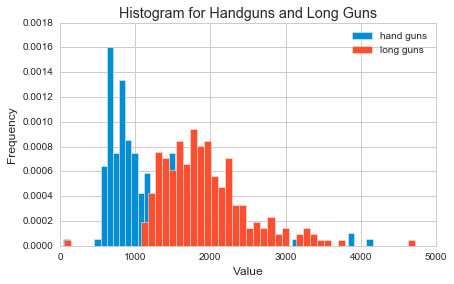

In [94]:
# Wyoming State

z_p_scores(wyoming_permit_dat)

The z-value comes out to be -3.44667357245666
The p-value comes out to be 0.0005675338638824006


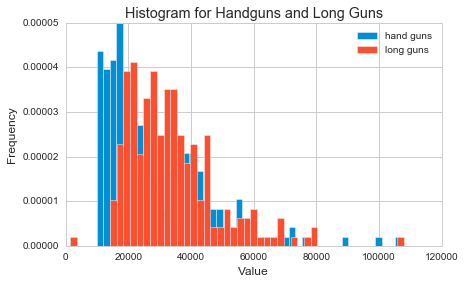

In [95]:
# Texas state

texas_dat = permit_data[permit_data.state == 'Texas']

z_p_scores(texas_dat)

<a id = 'conclusion'></a>
## Conclusion

For the questions answered so far, and the questions raised, it was concluded that NICS has recorded an increasing rate of permit checks throughout the nation. There were general seasonal trends observed with some periods recording sharp spikes in important statistics. Its intriguing to note on what possibly caused such sharp spikes in an otherwise more-or-less consistent data.

Strangely, post 2013, there seems to be a decrease in the statistics as well. Since I'm not an American national and owing to lack of domestic American affairs, I cannot clearly state the reasons behind such trends but this suggests that states have either passed additional laws to limit weapon ownership and also develop enforcement infrastructure further, leading to a decreased record of checks and hence weapon sales. However, some huge spikes around the turn of this decade still remain mysterious.

It was also concluded that data are inconsistent across states. As can be seen above, the state of Wyoming records more handguns than long guns and there seems to be vast difference between their averages. Meanwhile, states like California and Arizona record almost consistent weapon checks on both categories of arms.

However, like every other data available through any source, there are limitations bound to exist. In the datasets available to us, there were several of them, like so:
- The existence of many, even thousands of NA values. Inconsistency in a dataset's values reduces its overall quality and in cases where NaN values are in high degrees, false results are bound to found. In addition, dealing with such values does not fully eliminate the problem of accuracy since there are several ways in dealing with such instances and not every solution can take away the obstruction of inaccurate data. In most cases, research needs to be done on the pattern of values that can be filled in NaN cells and then proceeded.

- Inconsistency in data recording. Like the [source](# https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md) of the data itself quotes down, there are inconsistencies in the data because of several factors such as differing state laws and inconsistent records for permit checks during the onset of the NICS system from state-to-state. In addition, the difference in state laws' and their overall method of operation prevented lots of data being recorded. One example is that observed for California where authorities themselves noted that due to factors differing from the ones required by NICS, several permit checks went unrecorded. These are instances that bury the true overall picture of an analysis.

- The availability of census data with this data kit is in my belief an uncalled thing for it establishes no solid relationship between what we under the `gun_data` and `census`. Sure, a number of insights too can be extracted through the census but that will require more research while the existing layout of the `census` disables one to establish meaningful results in connection with `gun_data`. This will require several steps of cleaning and file-merging to extract insights.

This concludes the firearms analysis. Hoping it offered a valuable purpose.

In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Firearms_analysis.ipynb'])

0